In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/dataset/Social_Network_Ads.csv')

In [4]:
dataset.head()
dataset.info()
print(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50         

In [5]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [6]:
y = dataset.iloc[:, 4].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [8]:
print('Shape of X_train =', X_train.shape)
print('Shape of Y_train =', y_train.shape)
print('Shape of X_test =', X_test.shape)
print('Shape of Y_test =', y_test.shape)

Shape of X_train = (320, 2)
Shape of Y_train = (320,)
Shape of X_test = (80, 2)
Shape of Y_test = (80,)


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [13]:
from sklearn.metrics import confusion_matrix

[[55  3]
 [ 1 21]]
0.95


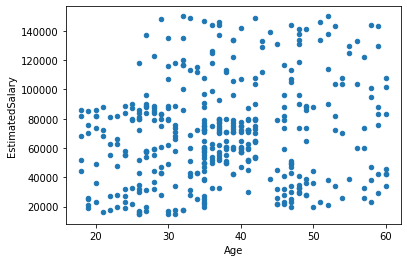

In [14]:
print(confusion_matrix(y_test,y_pred))
print(classifier.score(X_test,y_test))

dataset.plot(kind='scatter',x='Age',y='EstimatedSalary')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


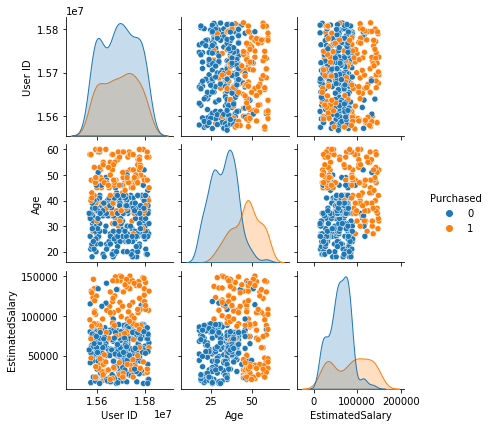

In [15]:
import seaborn as sns
sns.pairplot(dataset,hue='Purchased',size=2)

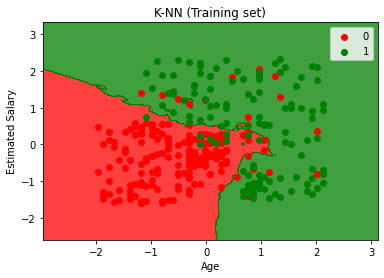

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()